In [33]:
import numpy as np 
from matplotlib import pyplot as plt
from tqdm import tqdm

In [128]:
x_vals = np.linspace(0,25,100)
slope = 3.0 
intercept = 12

y_true = slope*x_vals + intercept

y_vals = y_true + np.random.normal(y_true,15)

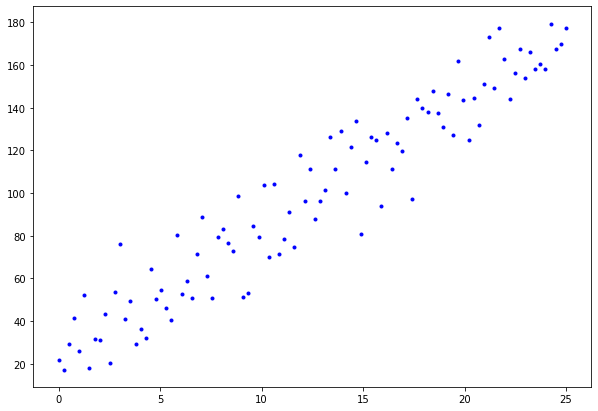

In [129]:
plt.figure(figsize = (10,7))
plt.plot(x_vals, y_vals, '.b')
plt.show()

In [155]:
import numpy as np

class LinRegress:
    def __init__(self,x,y,p0 = [1,1], alpha = 0.0001):
        self.x = x 
        self.y = y 
        self.N = len(self.x)
        self.m = p0[0]
        self.b = p0[1]
        self.alpha = alpha
        
    def grad_calc(self):
        N_inv = (-2/self.N)
        grad_m = N_inv*np.sum((self.y - (self.m*self.x + self.b))*self.x)
        grad_b = N_inv*np.sum(self.y - (self.m*self.x + self.b))
        
        grad_arr = np.array([grad_m,grad_b])
        
        return grad_arr
    
    def update(self):
        m_grad = self.grad_calc()[0]
        b_grad = self.grad_calc()[1]
        
        m_new = self.m - self.alpha*m_grad
        b_new = self.b - self.alpha*b_grad
        
        new_params = np.array([m_new,b_new])
        
        return new_params
    
    def MSE_calc(self):
        N_inv = (1/self.N)
        return N_inv*np.sum((self.y - (self.m*self.x + self.b))**2)
        
    
    def fit(self, tol = 1e-5, max_iter = 100000):
        iter_val = 0
        while self.MSE_calc() > tol and iter_val < max_iter:
            self.m,self.b = self.update()
            iter_val += 1 
            
        return np.array([self.m,self.b])
    
    def plot_fit(self, figsize = (10,7), data_color = "blue", set_data_size = 8.0, fit_size = 2.0, fit_color = "red", xlab = "X", ylab = "Y", xfont = 24, yfont = 24,
                show_title = False, title = "Linear Fit", title_font  = 26, ticksize = 20, legendsize = 20):
        plt.figure(figsize = figsize)
        plt.plot(self.x, self.y, '.', color = data_color, markersize = set_data_size)
        plt.plot(self.x, self.m*self.x + self.b, '--', color = fit_color, linewidth = fit_size, label = "Fit: Y = M*X + B \n M = {:.2f} \n B  = {:.2f}".format(self.m, self.b))
        plt.xlabel(xlab, fontsize = xfont)
        plt.ylabel(ylab, fontsize = yfont)
        plt.xticks(fontsize = ticksize)
        plt.yticks(fontsize = ticksize)
        plt.legend(fontsize = legendsize)
        if show_title: 
            plt.title(title, fontsize = title_font)
        plt.show()
    


In [156]:
result = LinRegress(x_vals, y_vals, p0 = [2.1,7.8])

In [157]:
m,b = result.fit()

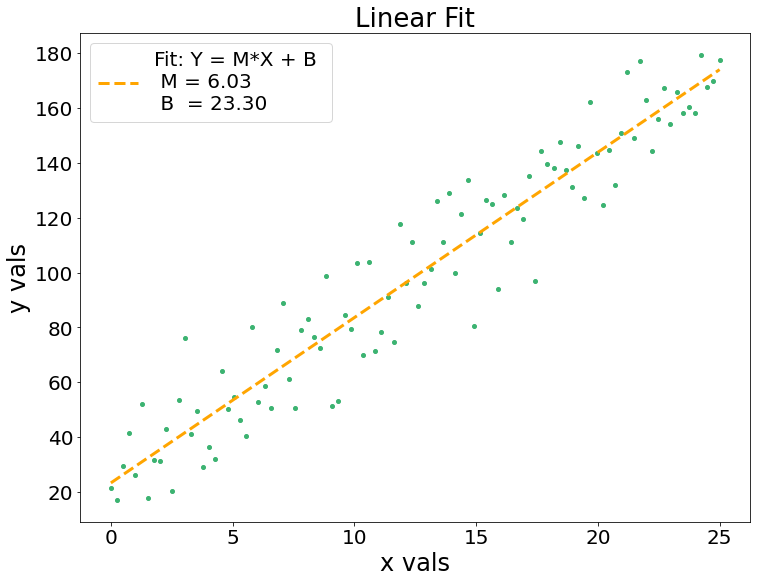

In [158]:
result.plot_fit(figsize = (12,9), show_title = True, fit_size = 3.0, data_color = "mediumseagreen", fit_color = "orange", xlab = "x vals", ylab = "y vals")